# IRIS - Connection I

![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.2, random_state=2021)

In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

## **length끼리, width끼리**

In [7]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [8]:
tr_x_l = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)']]
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)']]

In [9]:
tr_x_l.shape, tr_x_w.shape

((120, 2), (120, 2))

In [10]:
te_x_l = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)']]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)']]

## One-hot Encoding

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)


In [13]:
train_y.shape

(120, 3)

## Modeling : multi-input & Concatenate layer

In [14]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [15]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_l = Input(shape=(2,))
hl_l = Dense(2, activation=relu)(il_l)

il_w = Input(shape=(2,))
hl_w = Dense(2, activation=relu)(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation=softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

## 모델 시각화

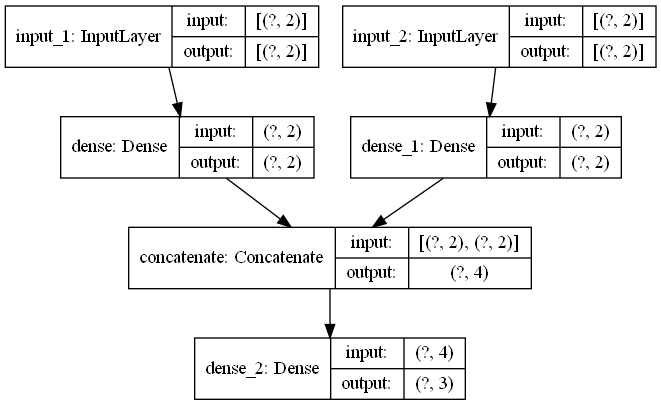

In [16]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [17]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

In [18]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.15,
          epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 0s 29ms/step - loss: 1.3515 - accuracy: 0.0882 - val_loss: 1.3153 - val_accuracy: 0.1667
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.3341 - accuracy: 0.2451 - val_loss: 1.3002 - val_accuracy: 0.1667
Epoch 3/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.3202 - accuracy: 0.2745 - val_loss: 1.2868 - val_accuracy: 0.3333
Epoch 4/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.3064 - accuracy: 0.2941 - val_loss: 1.2766 - val_accuracy: 0.3333
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.2955 - accuracy: 0.3137 - val_loss: 1.2669 - val_accuracy: 0.3333
Epoch 6/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.2845 - accuracy: 0.3137 - val_loss: 1.2575 - val_accuracy: 0.3333
Epoch 7/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.2739 - accuracy: 0.3235 - val_loss: 1.2484 - val_accuracy: 0.3333
Epoch 8/1000
4/4 [=

---
---
---
---
---

# IRIS - Connection I practice

- 위의 코드를 **그대로** 따라서 코드 작성하기!

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [33]:
iris = load_iris()

x = iris.data
y = iris.target

In [34]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [51]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=.2, random_state=2022)

## **length끼리, width끼리**

In [52]:
train_x_l = train_x.filter(like="length")
train_x_w = train_x.filter(like="width")

train_x_l.shape, train_x_w.shape

((120, 2), (120, 2))

## One-hot Encoding

In [53]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)

train_y.shape, test_y.shape

((120, 3), (30, 3))

## Modeling : multi-input & Concatenate layer

In [54]:
# 1. session clear
keras.backend.clear_session()

# 2. make layers
il1 = Input(shape=(2,))
ol1 = Dense(2, activation='relu')(il1)

il2 = Input(shape=(2,))
ol2 = Dense(2, activation='relu')(il2)

cl = Concatenate()([ol1, ol2])
ol = Dense(3, activation='softmax')(cl)

# 3. 모델 생성
model = Model([il1, il2], ol)

# 4. 모델 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 2)            6           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2)            6           input_2[0][0]                    
_______________________________________________________________________________________

## 모델 시각화

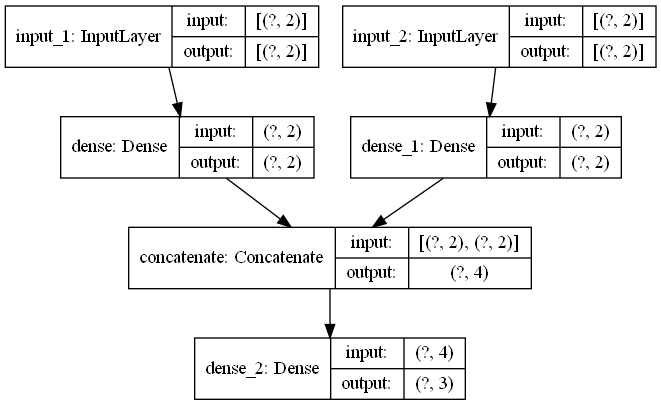

In [55]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [56]:
es = EarlyStopping(monitor='val_loss', min_delta=0,
                   patience=5, verbose=1, restore_best_weights=True)

In [57]:
model.fit([train_x_l, train_x_w], train_y, epochs=1000, verbose=1,
          validation_split=.2,
          callbacks=[es])

Epoch 1/1000
3/3 [==============================] - 0s 32ms/step - loss: 3.2250 - accuracy: 0.2917 - val_loss: 2.5406 - val_accuracy: 0.3750
Epoch 2/1000
3/3 [==============================] - 0s 6ms/step - loss: 3.1869 - accuracy: 0.2917 - val_loss: 2.5113 - val_accuracy: 0.3750
Epoch 3/1000
3/3 [==============================] - 0s 7ms/step - loss: 3.1495 - accuracy: 0.2917 - val_loss: 2.4822 - val_accuracy: 0.3750
Epoch 4/1000
3/3 [==============================] - 0s 7ms/step - loss: 3.1128 - accuracy: 0.2917 - val_loss: 2.4536 - val_accuracy: 0.3750
Epoch 5/1000
3/3 [==============================] - 0s 9ms/step - loss: 3.0738 - accuracy: 0.2917 - val_loss: 2.4256 - val_accuracy: 0.3750
Epoch 6/1000
3/3 [==============================] - 0s 5ms/step - loss: 3.0382 - accuracy: 0.2917 - val_loss: 2.3979 - val_accuracy: 0.3750
Epoch 7/1000
3/3 [==============================] - 0s 7ms/step - loss: 3.0023 - accuracy: 0.2917 - val_loss: 2.3708 - val_accuracy: 0.3333
Epoch 8/1000
3/3 [=

In [58]:
train_x_w

,sepal width (cm),petal width (cm)
38,3.0,0.2
82,2.7,1.2
89,2.5,1.3
1,3.0,0.2
74,2.9,1.3
...,...,...
24,3.4,0.2
18,3.8,0.3
88,3.0,1.3
112,3.0,2.1
